In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from tool.core import data_types
from tool.pyqt_gui.qt_utils import find_pkl

In [46]:
session_folder = '/home/nastya/Desktop/ood_datasets/DroneBird/oodsession_7'
ood_file_path = find_pkl.get_ood_file(session_folder)
embeddings_file = find_pkl.get_embeddings_file(session_folder)

print(ood_file_path)
print(embeddings_file)

ood_df = pd.read_pickle(ood_file_path)
emb_df = pd.read_pickle(embeddings_file)

data_df = pd.merge(emb_df, ood_df[
                  [data_types.RelativePathType.name(), data_types.OoDScoreType.name()]],
                                    on=data_types.RelativePathType.name(), how='inner')

ood_score = data_df[data_types.OoDScoreType.name()].values

/home/nastya/Desktop/ood_datasets/DroneBird/oodsession_7/ood_score_230508_133303.761.ood.pkl
/home/nastya/Desktop/ood_datasets/DroneBird/oodsession_7/TimmResnetWrapper_densenet121_DroneBird_1024_230507_134347.030.emb.pkl


In [47]:
def get_predicted_label(probs, labels):
    return labels[np.argmax(probs)]

data_df["pred_label"] = data_df.apply(lambda row: get_predicted_label(row[data_types.ClassProbabilitiesType.name()], 
                                                                      row[data_types.LabelsType.name()]), axis=1).values

data_df["miss"] = data_df.apply(lambda row: row[data_types.LabelType.name()] != row["pred_label"], axis=1).values

data_df["conf"] = data_df.apply(lambda row: max(row[data_types.ClassProbabilitiesType.name()]), axis=1).values


In [56]:
ood_folders= ['drones/close_to_ood', 'birds/close_to_ood', 'bird_drone',
              'ood_samples'] 

def in_ood(img_path: str) -> bool:
    p, _ = os.path.split(img_path)
    return p in ood_folders

data_df["ood_flag"] = data_df.apply(lambda row: in_ood(row[data_types.RelativePathType.name()]), axis=1).values

In [57]:
n_samples = data_df.shape[0]
(data_df["ood_flag"][:n_samples].values).sum()

91

In [58]:
data_df.sort_values(by=[data_types.OoDScoreType.name()], inplace=True, ascending=False)
(data_df["ood_flag"][:50].values).sum()

13

In [59]:
data_df.sort_values(by=[data_types.OoDScoreType.name()], inplace=True, ascending=False)
(data_df["ood_flag"][:100].values).sum()

28

In [52]:
(data_df["miss"][:n_samples].values).sum()

129

In [53]:
(data_df[data_df["miss"]]["ood_score"].values > 0.75).sum()

84

In [54]:
data_df.loc[(data_df['miss']) & (data_df['ood_score'] > 0.75) & (data_df['conf'] > 0.75)].shape[0]

70

In [55]:
data_df[data_df["ood_flag"]].tail(10)

,relative_path,labels,test_sample,label,embedding,class_probabilities,ood_score,pred_label,miss,conf,ood_flag
1354,birds/close_to_ood/singleBirdinsky247.jpeg,"[Drone, Bird]",True,Bird,"[0.007603264, 0.23396097, 0.017928487, 0.05420...","[0.001922493800520897, 0.9980775117874146, 0.0]",0.024516,Bird,False,0.998078,True
697,drones/close_to_ood/c6f4657d-a767-4168-84fa-4e...,"[Drone, Bird]",True,Drone,"[0.0, 0.08568677, 0.09202237, 0.12935555, 0.40...","[0.9954679012298584, 0.004532050807029009, 0.0]",0.021603,Drone,False,0.995468,True
1361,bird_drone/4N0W8J7_copyright_image_218654.jpeg,"[Drone, Bird]",True,Bird,"[0.02487148, 0.08228514, 0.027306607, 0.041908...","[0.9999998807907104, 1.351898646362315e-07, 0.0]",0.018062,Drone,True,1.000000,True
1375,ood_samples/a461bb93-1577-4663-a5c4-5652b91b14...,"[Drone, Bird]",True,Bird,"[0.0026037518, 0.035837807, 0.022733284, 0.105...","[0.9999382495880127, 6.173519795993343e-05, 0.0]",0.014321,Drone,True,0.999938,True
1381,ood_samples/balloons.jpg,"[Drone, Bird]",True,Bird,"[0.07218405, 0.026357725, 0.025536215, 0.06136...","[1.0, 3.683185006986278e-11, 0.0]",0.008375,Drone,True,1.000000,True
1378,ood_samples/0e1676df-c3e9-44de-aa4a-1e28d23bde...,"[Drone, Bird]",True,Bird,"[0.010288387, 0.05944834, 0.04383262, 0.096317...","[0.9999997615814209, 1.8115849798050476e-07, 0.0]",0.005414,Drone,True,1.000000,True
1399,ood_samples/fc81b00c-048f-432e-9251-517586852c...,"[Drone, Bird]",True,Bird,"[0.008126382, 0.07007074, 0.040404256, 0.12209...","[0.9998063445091248, 0.00019370975496713072, 0.0]",0.004872,Drone,True,0.999806,True
1403,ood_samples/AUjKlvd.jpg,"[Drone, Bird]",True,Bird,"[0.00859501, 0.020849817, 0.01079343, 0.070016...","[1.0, 1.065728838511859e-09, 0.0]",0.003850,Drone,True,1.000000,True
700,drones/close_to_ood/c617f8ac-74db-41a4-8bc1-aa...,"[Drone, Bird]",True,Drone,"[0.0, 0.13613696, 0.0908502, 0.13572598, 0.666...","[0.9999983310699463, 1.6385187109335675e-06, 0.0]",0.000238,Drone,False,0.999998,True
1393,ood_samples/df543bdd-b483-4ee4-a0f0-aed44d31fa...,"[Drone, Bird]",True,Bird,"[0.05478621, 0.009798736, 0.045270495, 0.02550...","[1.0, 9.199529910485573e-34, 0.0]",0.000204,Drone,True,1.000000,True


In [9]:
data_df[data_df["ood_flag"]]["relative_path"].values[-10:-1]

array(['drones/close_to_ood/e5ed9253-3142-4bc7-8ee3-5e6c8b0e8e45.png',
       'ood_samples/intel-laminar-rm1-03.jpg',
       'ood_samples/fc81b00c-048f-432e-9251-517586852c3e.jpg',
       'bird_drone/4N0W8J7_copyright_image_218654.jpeg',
       'ood_samples/balloons.jpg',
       'ood_samples/0e1676df-c3e9-44de-aa4a-1e28d23bde13.jpg',
       'ood_samples/a461bb93-1577-4663-a5c4-5652b91b14ac.jpg',
       'ood_samples/AUjKlvd.jpg',
       'drones/close_to_ood/c617f8ac-74db-41a4-8bc1-aace9601f01f.jpg'],
      dtype=object)

In [124]:
optuna_metrics = '/home/nastya/Desktop/OoDTool/tmp/trials_metrics.csv'

In [134]:
optuna_df = pd.read_csv(optuna_metrics)
# optuna_df.dropna(inplace=True, ignore_index=True)

In [137]:
optuna_df.iloc[233].user_attrs_tags

"('LogisticRegression_liblinear', 'LogisticRegression_lbfgs')"

In [127]:
optuna_df['user_attrs_k50'].max()

30

In [128]:
optuna_df['user_attrs_miss_with_high_ood'].max()

102

In [129]:
optuna_df['user_attrs_miss_with_high_ood_and_conf'].max()

82

In [117]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [121]:
optuna_df.loc[(optuna_df['user_attrs_miss_with_high_ood'] > 120) &\
              (optuna_df['user_attrs_miss_with_high_ood_and_conf'] > 90) &\
              (optuna_df['user_attrs_k100'] > 35)]

,number,value,datetime_start,datetime_complete,duration,params_c_exp_0_0,params_c_exp_0_1,params_c_exp_0_2,params_c_exp_0_3,params_c_exp_0_4,...,params_n_classifiers_1,params_tags,user_attrs_k100,user_attrs_k50,user_attrs_metric,user_attrs_miss_with_high_ood,user_attrs_miss_with_high_ood_and_conf,user_attrs_tags,user_attrs_total_miss,state
133,133,2.011163,2023-05-09 09:07:59.597721,2023-05-09 09:07:59.957029,0 days 00:00:00.359308,-4,-5,-9,-7,-12,...,3,8,36,22,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
226,226,2.011163,2023-05-09 09:08:32.378390,2023-05-09 09:08:32.712394,0 days 00:00:00.334004,-5,-7,-11,-4,-5,...,3,8,36,22,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
437,437,2.011163,2023-05-09 09:09:51.320388,2023-05-09 09:09:51.688949,0 days 00:00:00.368561,-7,-4,-11,-5,-12,...,3,9,36,21,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
463,463,2.011163,2023-05-09 09:10:01.096280,2023-05-09 09:10:01.443319,0 days 00:00:00.347039,-8,-5,-11,-4,-11,...,3,9,36,21,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
468,468,2.011163,2023-05-09 09:10:02.959838,2023-05-09 09:10:03.285450,0 days 00:00:00.325612,-7,-5,-11,-4,-12,...,3,9,36,21,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
471,471,2.011163,2023-05-09 09:10:04.185289,2023-05-09 09:10:04.598867,0 days 00:00:00.413578,-6,-5,-10,-4,-12,...,3,9,36,21,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
573,573,2.011163,2023-05-09 09:10:46.444286,2023-05-09 09:10:46.812796,0 days 00:00:00.368510,-4,-8,-5,-7,-12,...,3,8,36,22,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
656,656,2.036667,2023-05-09 09:11:21.610443,2023-05-09 09:11:22.013138,0 days 00:00:00.402695,-6,-4,-12,-5,8,...,3,8,37,22,2.036667,122,93,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
680,680,2.011163,2023-05-09 09:11:32.078991,2023-05-09 09:11:32.520658,0 days 00:00:00.441667,-8,-4,-12,-5,11,...,3,8,36,22,2.011163,121,92,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE
805,805,2.036667,2023-05-09 09:12:23.265401,2023-05-09 09:12:23.666895,0 days 00:00:00.401494,-5,-5,-12,-4,7,...,3,8,37,22,2.036667,122,93,"('LogisticRegression_lbfgs', 'LogisticRegressi...",129,COMPLETE


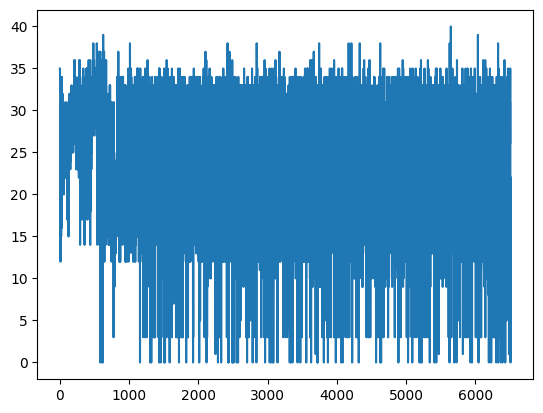

In [92]:
#plt.plot(optuna_df[optuna_df['user_attrs_miss_with_high_ood'] > 120]['user_attrs_miss_with_high_ood'], 'x')
#plt.plot(optuna_df['user_attrs_miss_with_high_ood_and_conf'])
plt.plot(optuna_df['user_attrs_k100'])
#plt.plot(optuna_df['user_attrs_metric'])

plt.show()